## 导入文件
- sheet_name=2（实际sheet3）

In [1]:
import pandas as pd

# 指定要读取的列
columns = ['Length/AA', 'AF-TM','1.0-0.9-TM','0.9-0.8-TM','0.8-0.7-TM','0.7-0.6-TM','0.6-0.5-TM','0.5-0.4-TM','0.4-0.3-TM']
# 读取.xlsx文件并只读取指定列的数据
df = pd.read_excel("H:\Graduation_project\DataBase\database.xlsx", usecols=columns,sheet_name=2)

# 取第2-25行数据（即Globular proteins数据），同理取其他的
df_globular  = df.iloc[0:24, :]
df_membrane = df.iloc[24:48, :]
df_fibrous = df.iloc[48:72, :]
df_unstructured = df.iloc[72:96, :]

# 将四个DataFrame合并成一个DataFrame  
df = pd.concat([df_globular.assign(label='Globular'), 
                df_membrane.assign(label='Membrane'), 
                df_fibrous.assign(label='Fibrous'),
                df_unstructured.assign(label='Unstructured')])

print(df.head(5))
# 计算'Length/AA'列的样本总量并输出结果
count = df['Length/AA'].count()
print("样本总量为: ", count)

   Length/AA    AF-TM  1.0-0.9-TM  0.9-0.8-TM  0.8-0.7-TM  0.7-0.6-TM  \
0        340  0.99373     0.98579         NaN         NaN         NaN   
1        482  0.79617     0.98924         NaN         NaN         NaN   
2        442  0.93410     0.99215         NaN         NaN         NaN   
3        309  0.97439     0.99962         NaN         NaN         NaN   
4        311  0.97639     0.96386         NaN         NaN         NaN   

   0.6-0.5-TM  0.5-0.4-TM  0.4-0.3-TM     label  
0         NaN         NaN         NaN  Globular  
1         NaN         NaN         NaN  Globular  
2         NaN         NaN     0.75291  Globular  
3         NaN         NaN     0.83466  Globular  
4         NaN     0.78728     0.91986  Globular  
样本总量为:  96


## 看AF整体表现

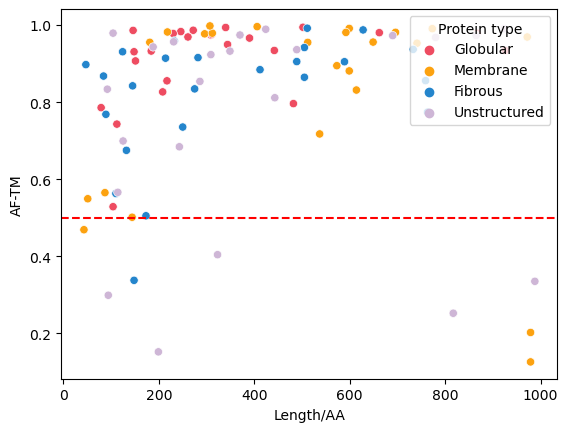

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Length/AA', y='AF-TM', hue='label', data=df, palette={'Globular': '#ee4c61', 'Membrane': '#fca210', 'Fibrous': '#2485cc', 'Unstructured': '#ceb6d6'})

plt.axhline(y=0.5, color='r', linestyle='--')
# plt.annotate('Threshold', xy=(10, 6.5), fontsize=12)

# 显示图例 
plt.legend(loc='upper right', title='Protein type')

plt.show()

100.0
87.5
95.83333333333334
75.0


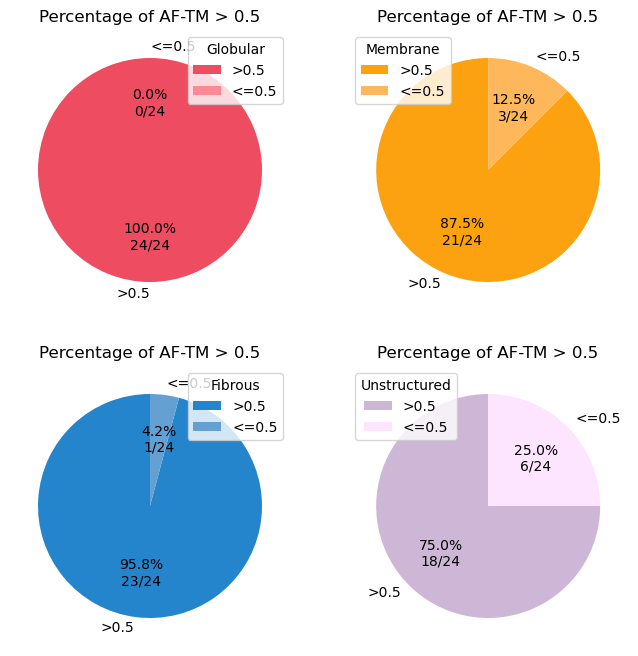

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 计算每个数据集中大于0.5的tm数据个数和总tm数据个数的百分比
globular_total_tm = df_globular['AF-TM'].count()
globular_below6_tm = (df_globular['AF-TM'] > 0.5).sum()
globular_below6_percent = globular_below6_tm / globular_total_tm * 100
print(globular_below6_percent)

membrane_total_tm = df_membrane['AF-TM'].count()
membrane_below6_tm = (df_membrane['AF-TM'] > 0.5).sum()
membrane_below6_percent = membrane_below6_tm / membrane_total_tm * 100
print(membrane_below6_percent)

fibrous_total_tm = df_fibrous['AF-TM'].count()
fibrous_below6_tm = (df_fibrous['AF-TM'] > 0.5).sum()
fibrous_below6_percent = fibrous_below6_tm / fibrous_total_tm * 100
print(fibrous_below6_percent)

unstructured_total_tm = df_unstructured['AF-TM'].count()
unstructured_below6_tm = (df_unstructured['AF-TM'] > 0.5).sum()
unstructured_below6_percent = unstructured_below6_tm / unstructured_total_tm * 100
print(unstructured_below6_percent)

###############————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
# Format the label to include count and percentage
def label_format(pct, count):
    absolute = int(count * pct / 100.0 + 0.5)
    return "{:.1f}%\n{}/{:.0f}".format(pct, absolute, count)

# 创建饼图数据
data1 = [globular_below6_tm, globular_total_tm - globular_below6_tm]
data2 = [membrane_below6_tm, membrane_total_tm - membrane_below6_tm]
data3 = [fibrous_below6_tm, fibrous_total_tm - fibrous_below6_tm]
data4 = [unstructured_below6_tm, unstructured_total_tm - unstructured_below6_tm]
labels = ['>0.5', '<=0.5']

# 绘制饼图
# labels = ['All alpha', 'All beta', 'Alpha + beta']
# sizes = [allalpha_below6_percent, allbeta_below6_percent, alphabeta_below6_percent]
colors1 = ['#ee4c61', '#ff8a95']
colors2 = ['#fca210', '#ffb75b']
colors3 = ['#2485cc', '#65a0d3']
colors4 = ['#ceb6d6', '#fee5ff']

# 创建包含 4 个子图的图形窗口
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

if globular_below6_percent > 0:
    axs[0][0].pie(data1, labels=labels, colors=colors1, autopct=lambda pct: label_format(pct, globular_total_tm), startangle=90)
    axs[0][0].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[0][0].legend(labels, title='Globular', loc='best')
else: 
    axs[0][0].axis('off')

if membrane_below6_percent > 0:
    axs[0][1].pie(data2, labels=labels, colors=colors2, autopct=lambda pct: label_format(pct, membrane_total_tm), startangle=90)
    axs[0][1].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[0][1].legend(labels, title='Membrane', loc='best')
else: 
    axs[0][1].axis('off')

if fibrous_below6_percent > 0:
    axs[1][0].pie(data3, labels=labels, colors=colors3, autopct=lambda pct: label_format(pct, fibrous_total_tm), startangle=90)
    axs[1][0].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[1][0].legend(labels, title='Fibrous', loc='best')
else: 
    axs[1][0].axis('off')

if unstructured_below6_percent > 0:
    axs[1][1].pie(data4, labels=labels, colors=colors4, autopct=lambda pct: label_format(pct, unstructured_total_tm), startangle=90)
    axs[1][1].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[1][1].legend(labels, title='Unstructured', loc='best')
else: 
    axs[1][1].axis('off')

# 显示饼图
plt.show()


## 补充内部比较

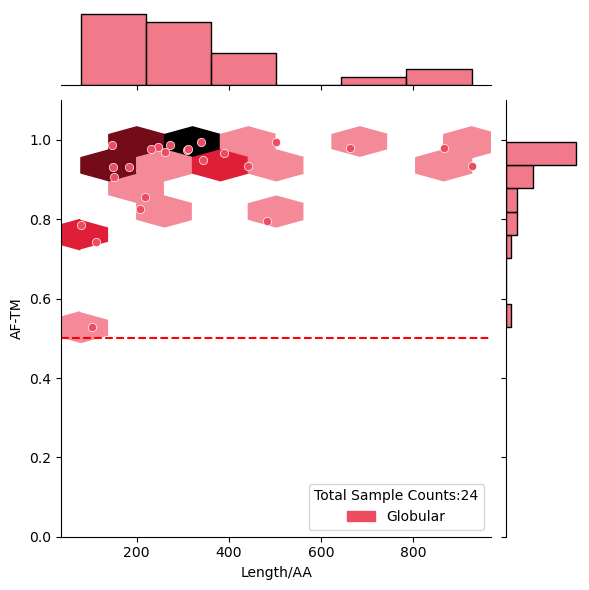

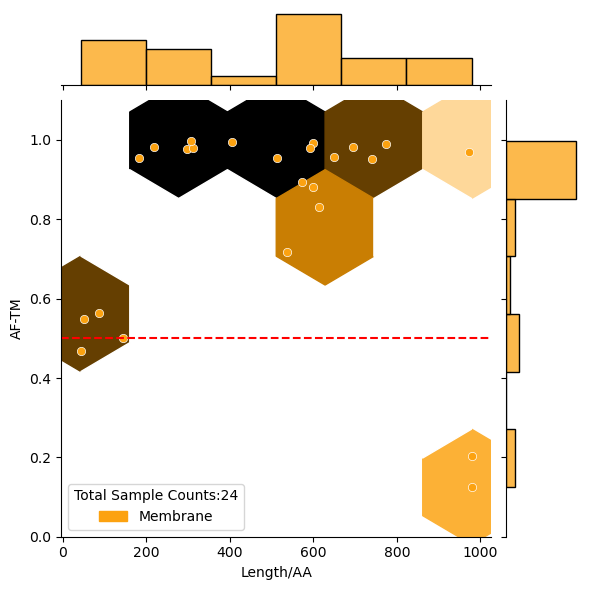

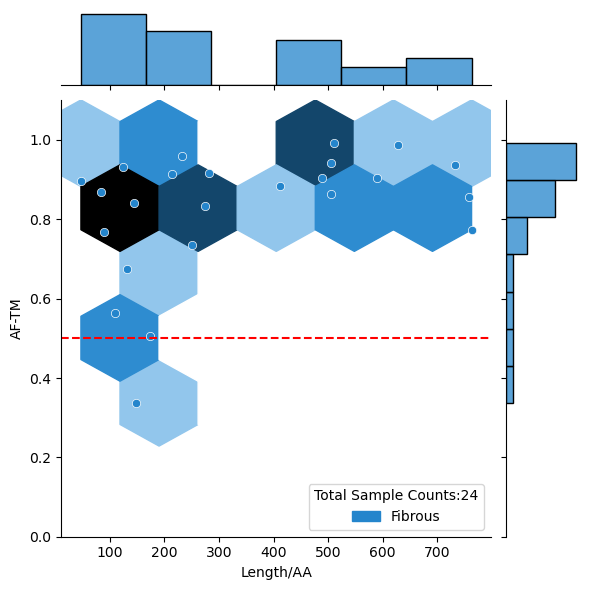

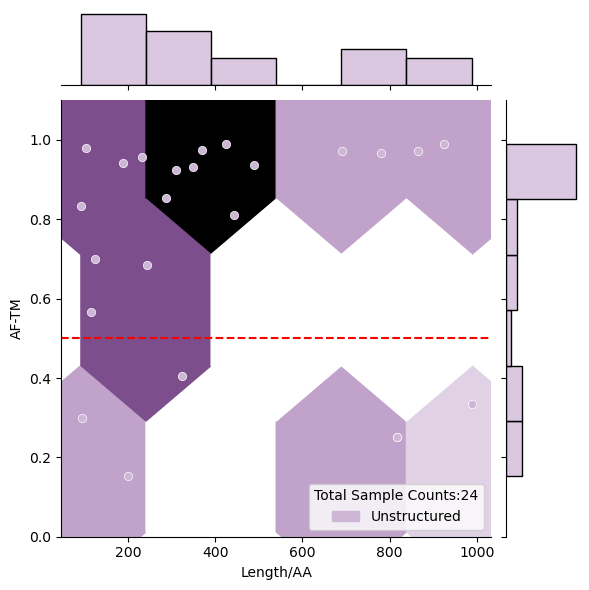

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制散点图附带直方图
sns.jointplot(x='Length/AA',y='AF-TM',data=df_globular,kind="hex", label='Globular', color='#ee4c61', ylim=(0, 1.1))
sns.scatterplot(x='Length/AA', y='AF-TM', data=df_globular, color='#ee4c61')
plt.axhline(y=0.5, color='r', linestyle='--')
leg = plt.legend(title="Total Sample Counts:"+str(df_globular['AF-TM'].count()), loc='lower right')
# 更改图例方块的颜色
for handle in leg.legendHandles:
    handle.set_color('#ee4c61')

sns.jointplot(x='Length/AA',y='AF-TM',data=df_membrane,kind="hex", label='Membrane', color='#fca210', ylim=(0, 1.1))
sns.scatterplot(x='Length/AA', y='AF-TM', data=df_membrane, color='#fca210')
plt.axhline(y=0.5, color='r', linestyle='--')
leg = plt.legend(title="Total Sample Counts:"+str(df_membrane['AF-TM'].count()), loc='lower left')
for handle in leg.legendHandles:
    handle.set_color('#fca210')

sns.jointplot(x='Length/AA',y='AF-TM',data=df_fibrous,kind="hex", label='Fibrous', color='#2485cc', ylim=(0, 1.1))
sns.scatterplot(x='Length/AA', y='AF-TM', data=df_fibrous, color='#2485cc')
plt.axhline(y=0.5, color='r', linestyle='--')
leg = plt.legend(title="Total Sample Counts:"+str(df_fibrous['AF-TM'].count()), loc='lower right')
for handle in leg.legendHandles:
    handle.set_color('#2485cc')

sns.jointplot(x='Length/AA',y='AF-TM',data=df_unstructured,kind="hex", label='Unstructured', color='#ceb6d6', ylim=(0, 1.1))
sns.scatterplot(x='Length/AA', y='AF-TM', data=df_unstructured, color='#ceb6d6')
plt.axhline(y=0.5, color='r', linestyle='--')
leg = plt.legend(title="Total Sample Counts:"+str(df_unstructured['AF-TM'].count()), loc='lower right')
for handle in leg.legendHandles:
    handle.set_color('#ceb6d6')

plt.show()